## JHU Turbulence Data

### Created by Yuying Liu, 11/10/2019

In [1]:
# imports
import os
import cv2
import sys
import torch
import pickle
# import pyJHTDB
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

%matplotlib notebook

module_path = os.path.abspath(os.path.join('../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import torch_cae_multilevel_V4 as net

Text(0.5,1,'sampled snapshot')

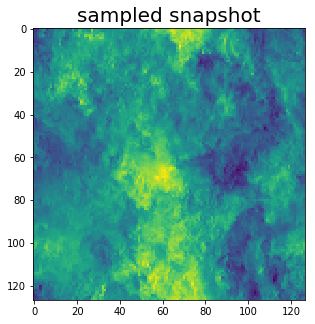

In [2]:
if os.path.exists('../data/npy/isotropic_turbulence.npy'):
    data = np.load('../data/npy/isotropic_turbulence.npy')
else:
    # load shared library
    lTDB = pyJHTDB.libJHTDB()
    #initialize webservices
    lTDB.initialize()

    # add token
    auth_token  = "*****"  # get ur own token from: http://turbulence.pha.jhu.edu/authtoken.aspx
    lTDB.add_token(auth_token)
    
    # info
    n = 3
    info = pyJHTDB.dbinfo.isotropic1024coarse
    name = info['name']
    x_sample_factor = 8
    y_sample_factor = 8
    nx = info['nx'] // x_sample_factor
    ny = info['ny'] // y_sample_factor
    xnodes = info['xnodes'][::x_sample_factor]
    ynodes = info['ynodes'][::y_sample_factor]
    zmid = np.pi
    
    lpoints = []
    for i in range(nx):
        for j in range(ny):
            lpoints.append([xnodes[i], ynodes[j], zmid])
            
    points = np.array(lpoints, dtype='float32')
    
    data = []
    for t in info['time'][::10]:
        sample = lTDB.getData(t, points, data_set = name, getFunction = 'getVelocity')
        sample = np.reshape(sample, (nx, ny, n))
        print('time t: ', t, ', sample shape: ', sample.shape)
        data.append(sample)
    
    data = np.stack(data, 0)
    Phi = np.squeeze(data[:, :-1, :-1, 0])
    data = (Phi - Phi.min()) / (Phi.max() - Phi.min())
    np.save('../data/npy/isotropic_turbulence.npy', data)
    
# viz
plt.figure(figsize=(5, 5))
plt.imshow(data[1, :, :])
plt.title('sampled snapshot',fontsize=20)

In [3]:
# init model & load data
data_path = '../data/npy/isotropic_turbulence.npy'
model_path = '../model/fluid/'
result_path = '../result/fluid/'

dataset = net.MultiScaleDynamicsDataSet(data_path, n_levels=4)

In [ ]:
# training
archs = [[1,2,3,4,5],[1,3,5,7,9],[1,4,7,10,13],[1,6,11,16,21]]
tols = [0.04, 0.02, 0.01, 0.005]
net.train_net(archs=archs, dataset=dataset, max_epoch=4000, batch_size=350, tols=tols, activation=torch.nn.Sequential(), 
              w=0.5, model_path=model_path, result_path=result_path, std=0.01, verbose=2)

# of filters in each group:  [1, 1, 1, 1]
*************************************************
Model @Level 0:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0071/0.0241/0.0156, global: 0.0084/0.0390/0.0237
[validation set] local: 0.0071/0.0262/0.0166, global: 0.0083/0.0505/0.0294
epoch [500/5000]:
[training set] local: 0.0045/0.0118/0.0081, global: 0.0055/0.0265/0.0160
[validation set] local: 0.0044/0.0151/0.0098, global: 0.0055/0.0359/0.0207
early stopping at 500th iteration due to satisfying reconstruction!

-------------------------------------------------
*************************************************
# of filters in each group:  [2, 2, 2, 2]
*************************************************
Model @Level 1:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training

/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type CAE. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2dBlock. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/lib/python3/dist-packages/torch/serialization.py:292: U

epoch [500/5000]:
[training set] local: 0.0051/0.0167/0.0109, global: 0.0053/0.0222/0.0138
[validation set] local: 0.0050/0.0254/0.0152, global: 0.0053/0.0315/0.0184
epoch [1000/5000]:
[training set] local: 0.0050/0.0157/0.0103, global: 0.0052/0.0209/0.0130
[validation set] local: 0.0049/0.0249/0.0149, global: 0.0052/0.0309/0.0181
epoch [1500/5000]:
[training set] local: 0.0049/0.0154/0.0102, global: 0.0052/0.0202/0.0127
[validation set] local: 0.0049/0.0246/0.0147, global: 0.0051/0.0306/0.0179
epoch [2000/5000]:
[training set] local: 0.0049/0.0150/0.0099, global: 0.0051/0.0202/0.0127
[validation set] local: 0.0048/0.0233/0.0141, global: 0.0051/0.0293/0.0172
epoch [2500/5000]:
[training set] local: 0.0048/0.0147/0.0098, global: 0.0051/0.0199/0.0125
[validation set] local: 0.0048/0.0233/0.0140, global: 0.0050/0.0291/0.0171
epoch [3000/5000]:
[training set] local: 0.0048/0.0146/0.0097, global: 0.0050/0.0196/0.0123
[validation set] local: 0.0048/0.0228/0.0138, global: 0.0050/0.0288/0.0169

epoch [3000/5000]:
[training set] local: 0.0021/0.0044/0.0033, global: 0.0027/0.0105/0.0066
[validation set] local: 0.0022/0.0060/0.0041, global: 0.0028/0.0154/0.0091
epoch [3500/5000]:
[training set] local: 0.0021/0.0044/0.0033, global: 0.0027/0.0103/0.0065
[validation set] local: 0.0021/0.0059/0.0040, global: 0.0028/0.0157/0.0092
early stopping at 3500th iteration due to slow convergence!

-------------------------------------------------
*************************************************
# of filters in each group:  [3, 3, 3, 3]
*************************************************
Model @Level 2:
Perform deepening & widening, train each architectures ...
losses printing format: local: mse/max/overall, global: mse/max/overall
epoch [1/5000]
[training set] local: 0.0065/0.0181/0.0123, global: 0.0065/0.0181/0.0123
[validation set] local: 0.0066/0.0211/0.0138, global: 0.0066/0.0225/0.0145
epoch [500/5000]:
[training set] local: 0.0026/0.0066/0.0046, global: 0.0026/0.0088/0.0057
[validation 

epoch [500/5000]:
[training set] local: 0.0013/0.0032/0.0022, global: 0.0016/0.0052/0.0034
[validation set] local: 0.0013/0.0048/0.0031, global: 0.0016/0.0069/0.0042
epoch [1000/5000]:
[training set] local: 0.0013/0.0031/0.0022, global: 0.0016/0.0054/0.0035
[validation set] local: 0.0013/0.0047/0.0030, global: 0.0016/0.0067/0.0042
epoch [1500/5000]:
[training set] local: 0.0013/0.0032/0.0022, global: 0.0015/0.0053/0.0034
[validation set] local: 0.0013/0.0048/0.0030, global: 0.0015/0.0068/0.0042
epoch [2000/5000]:
[training set] local: 0.0013/0.0031/0.0022, global: 0.0016/0.0055/0.0035
[validation set] local: 0.0013/0.0046/0.0030, global: 0.0016/0.0066/0.0041
epoch [2500/5000]:
[training set] local: 0.0012/0.0031/0.0022, global: 0.0015/0.0059/0.0037
[validation set] local: 0.0012/0.0048/0.0030, global: 0.0015/0.0068/0.0042
epoch [3000/5000]:
[training set] local: 0.0013/0.0030/0.0021, global: 0.0016/0.0055/0.0035
[validation set] local: 0.0013/0.0045/0.0029, global: 0.0016/0.0066/0.0041

### Results

In [6]:
# trained models at different levels
models = {}
print('model names: model_L{level}_{index}')
for file_name in sorted(os.listdir(model_path)):
    model_name, _ = file_name.split('.')
    print(model_name)
    models[model_name] = torch.load(os.path.join(model_path, file_name))

model names: model_L{level}_{index}
model_L0_0
model_L1_0
model_L1_1
model_L1_2
model_L1_3
model_L1_4
model_L2_0
model_L2_1
model_L2_2
model_L2_3
model_L2_4
model_L3_0
model_L3_1
model_L3_2
model_L3_3
model_L3_4


dict_keys(['0'])
dict_keys(['0', '1', '2', '3', '4'])
dict_keys(['0', '1', '2', '3', '4'])
dict_keys(['0', '1', '2', '3', '4'])


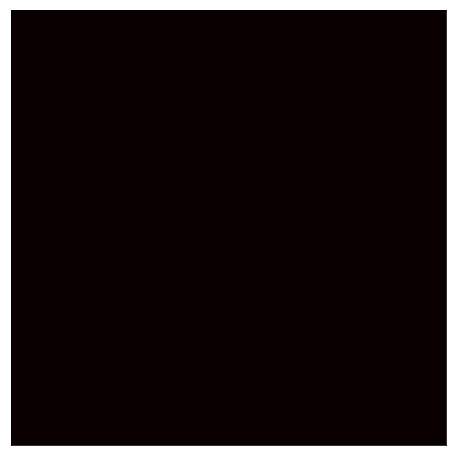

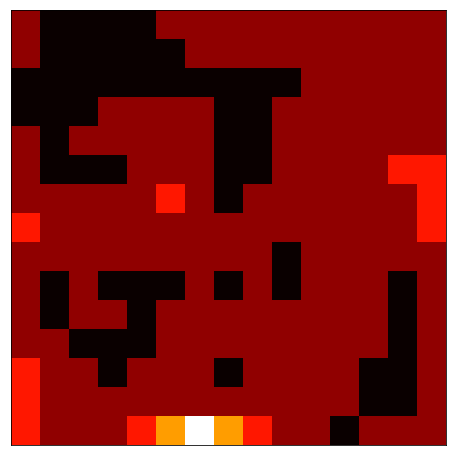

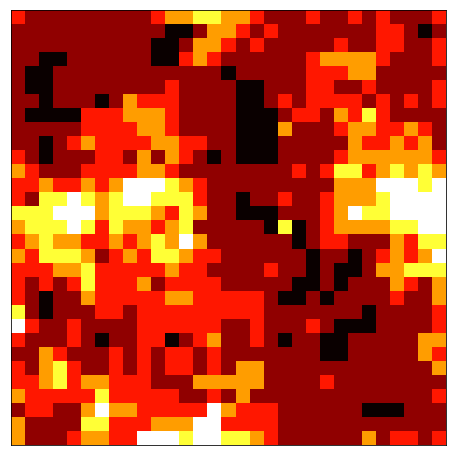

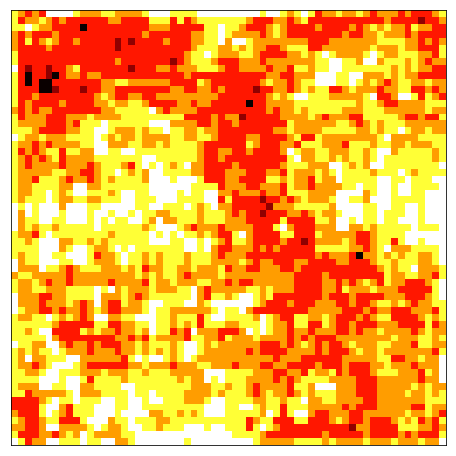

In [8]:
# choose the finest model
model = models['model_L3_4']

# resolved maps at different levels (that suggest poorly reconstructed regions)
for i in range(4):
    print(model.resolved_maps[str(i)].keys())
    
for i in range(4):
    level_maps = model.resolved_maps[str(i)]
    for key in level_maps.keys():
        if key == '0':
            intensities = (1 - level_maps[key])
        else:
            intensities += (1 - level_maps[key])
    file_name = 'L{}.png'.format(i)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(intensities.cpu().detach().numpy(), cmap='hot')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig(os.path.join(result_path, file_name))

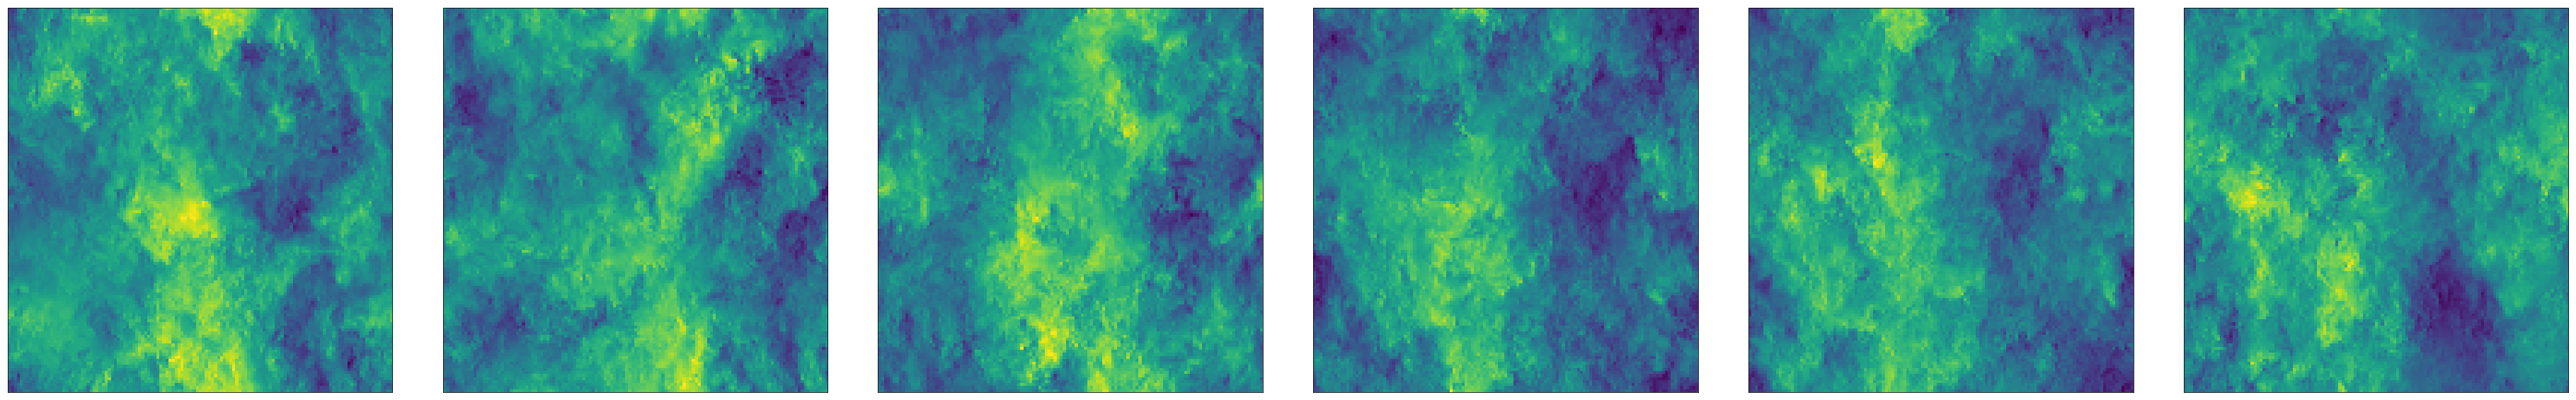

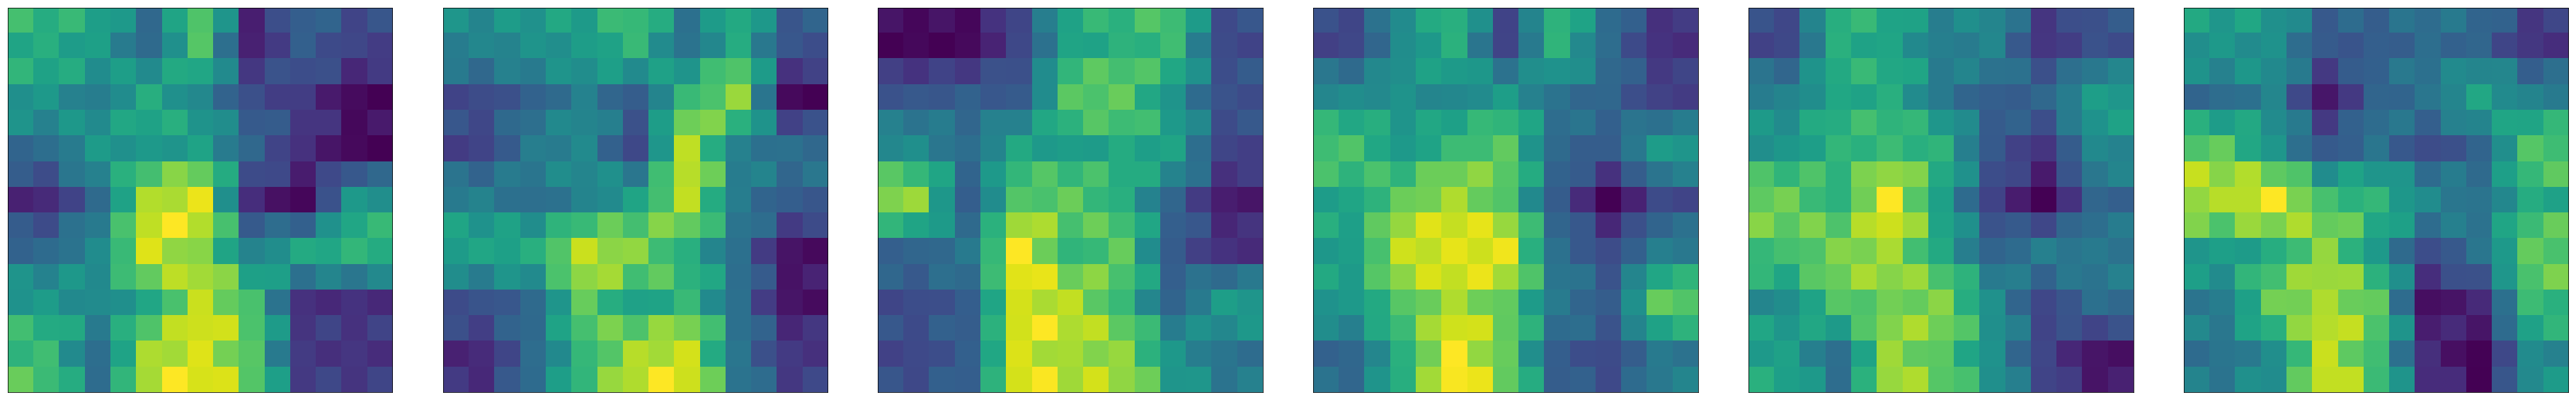

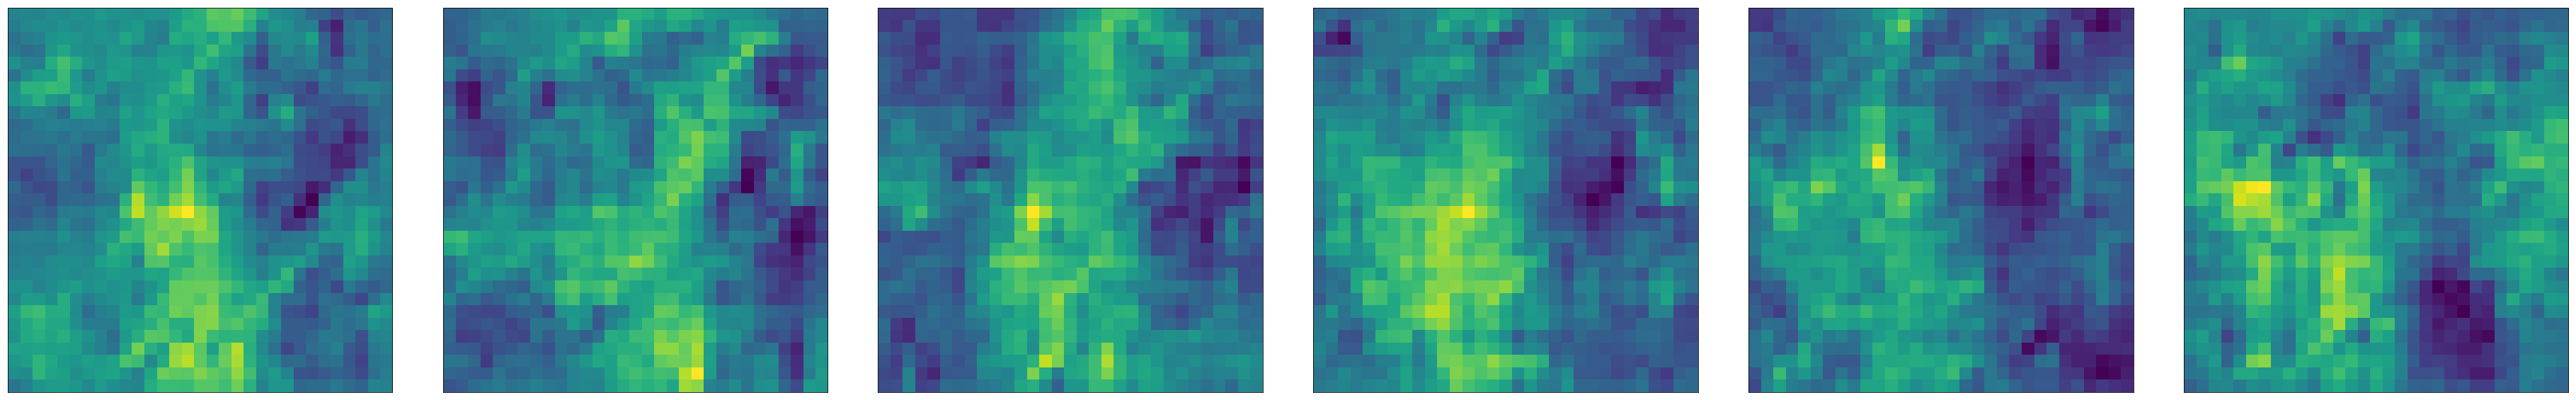

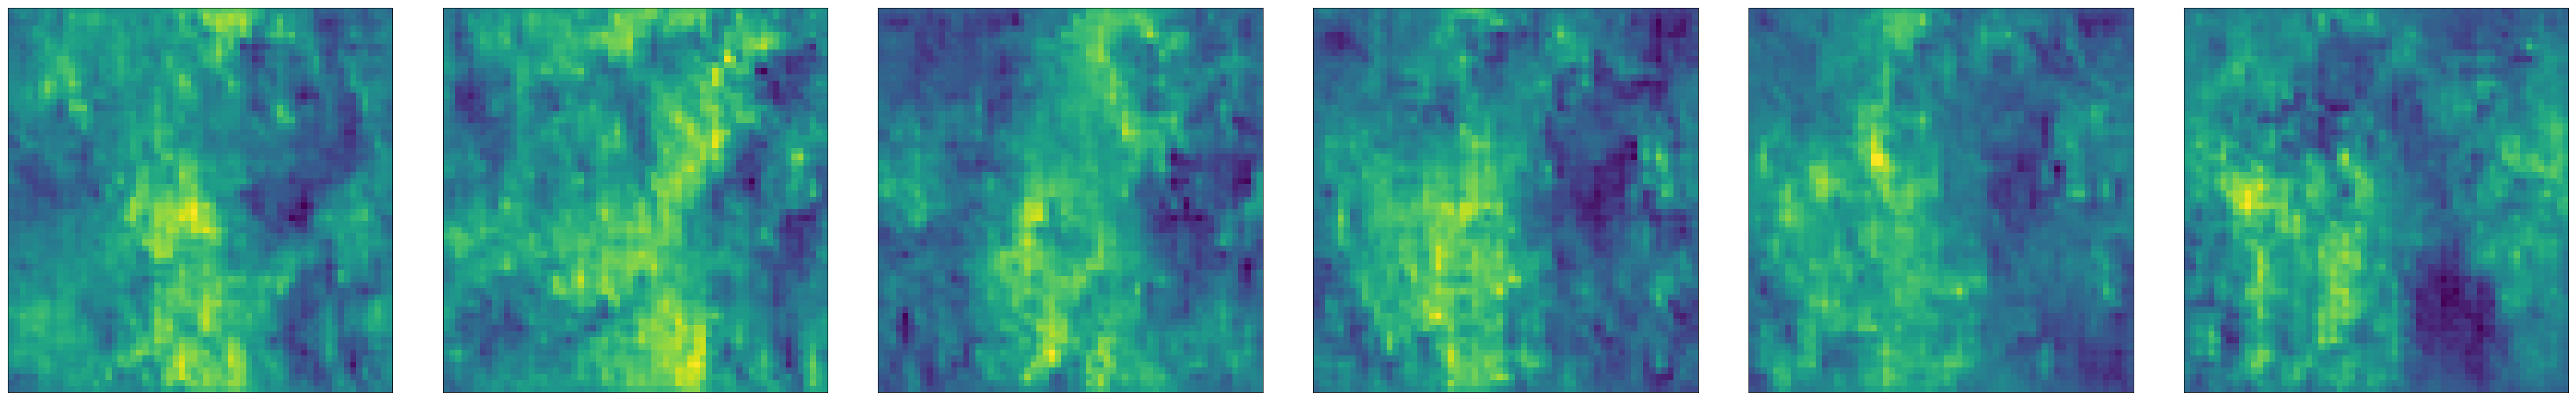

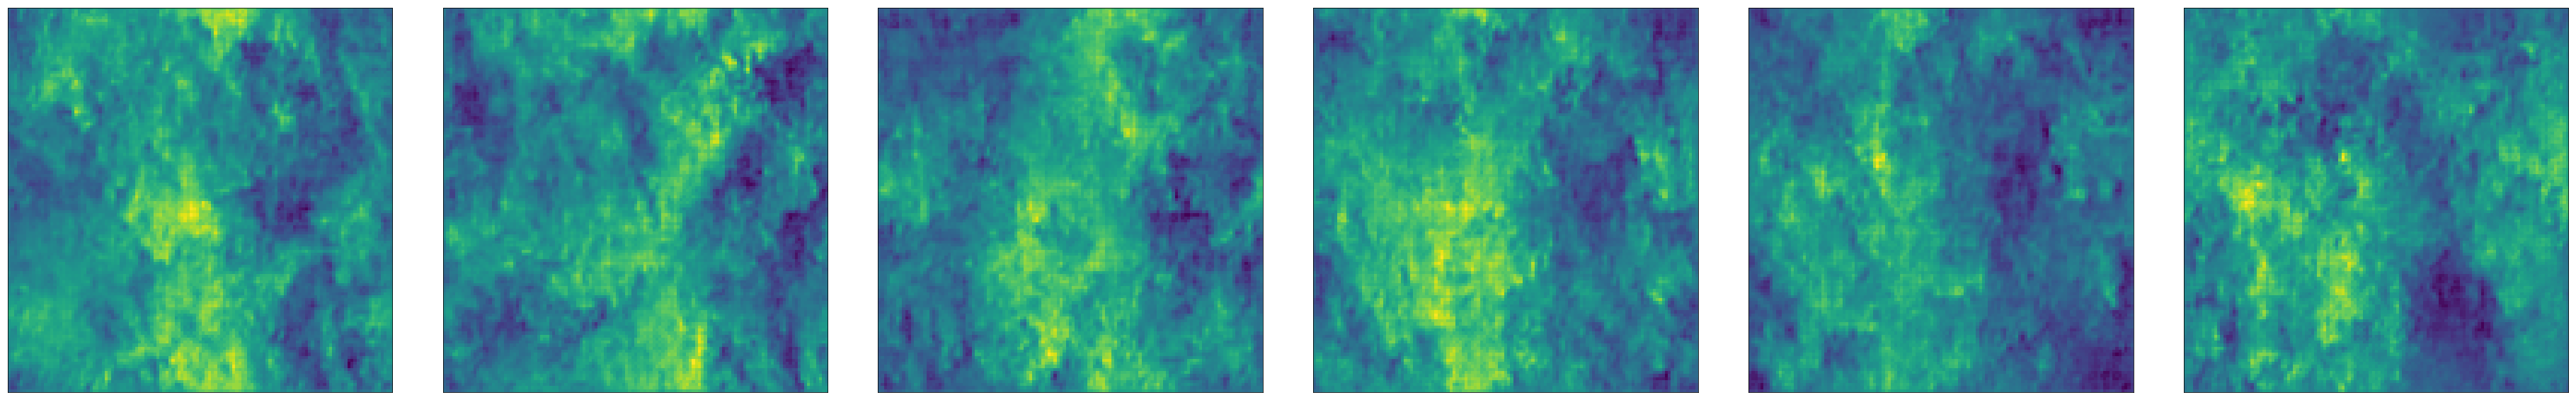

In [9]:
inds = np.array(sorted(dataset.test_inds))
dataset.test_inds = inds
n_snapshots = len(inds)
n_samples = 6
n_step = n_snapshots // 6

fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    axes[i].imshow(dataset.data[inds[i*n_step], :, :, :].squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_samples.png'), bbox_inches='tight')


model = models['model_L0_0']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=0)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].imshow(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.savefig(os.path.join(result_path, 'test_L0_reconstructions.png'), bbox_inches='tight')


model = models['model_L1_4']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=1)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].imshow(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_L1_reconstructions.png'), bbox_inches='tight')


model = models['model_L2_4']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=2)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].imshow(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_L2_reconstructions.png'), bbox_inches='tight')

model = models['model_L3_4']
fig, axes = plt.subplots(1, n_samples, figsize=(n_samples*11, 10))
plt.subplots_adjust(wspace=0.01)
for i in range(n_samples):
    _, _, data = dataset.obtain_data_at_current_level(level=3)
    output, _, _, _ = model(data[[i*n_step], :, :, :], model.cur_level)
    axes[i].imshow(output.squeeze().cpu().detach().numpy(), cmap='viridis')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
fig.savefig(os.path.join(result_path, 'test_L3_reconstructions.png'), bbox_inches='tight')

In [10]:
records = {}
for file_name in sorted(os.listdir(result_path)):
    if file_name.endswith('.dat'):
        key, _ = file_name.split('.')
        with open(os.path.join(result_path, file_name), 'rb') as f: 
            records[key]= pickle.load(f)

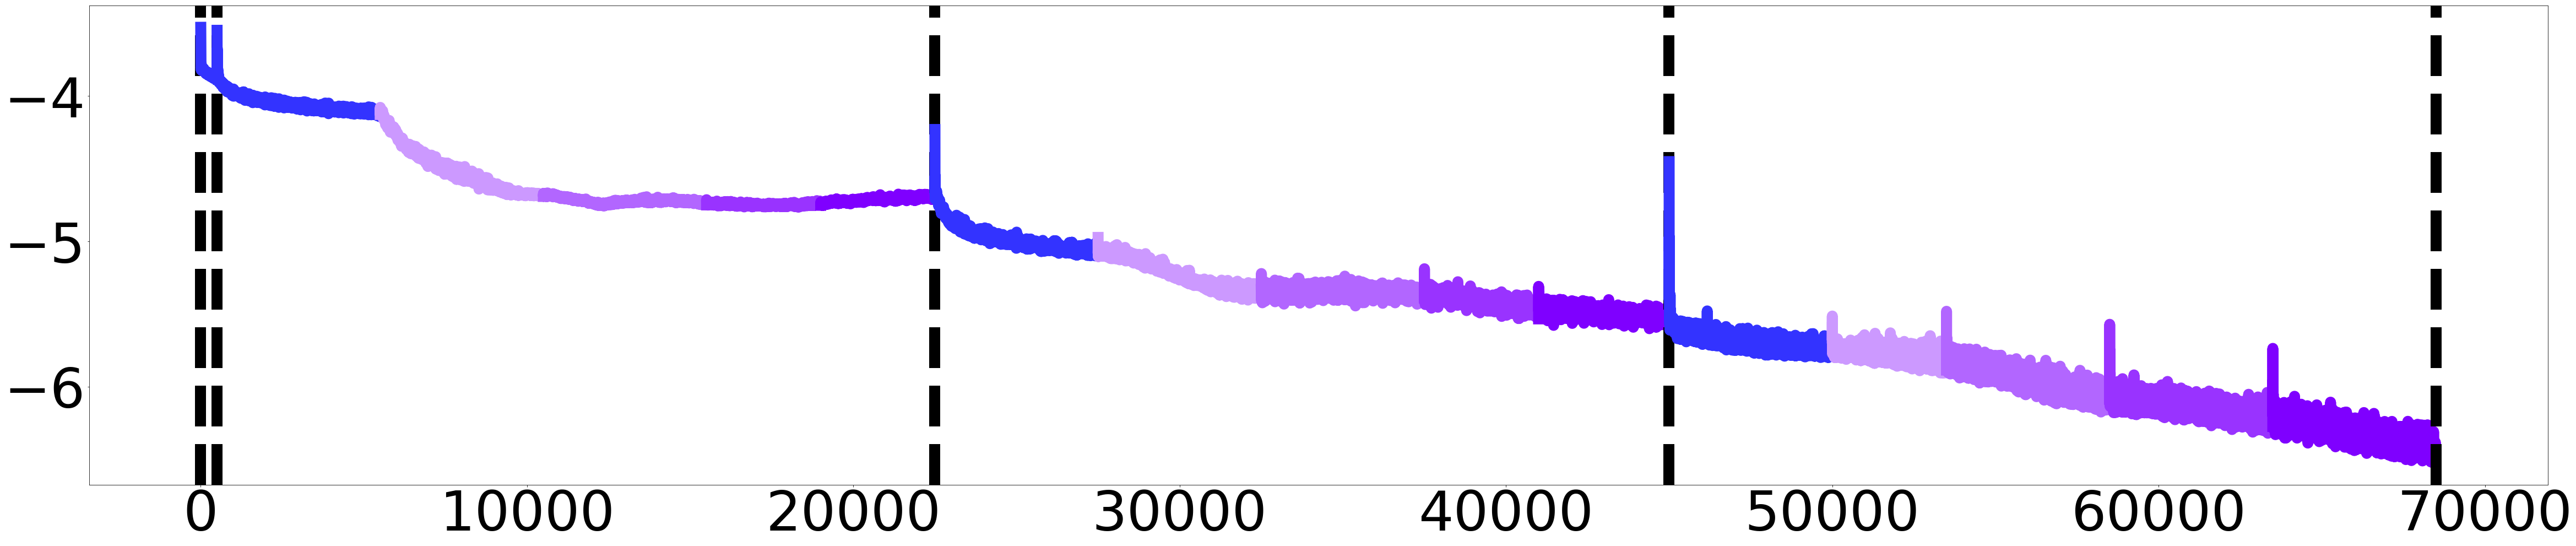

In [12]:
n_colors = 4
colors = [(51/255, 51/255, 255/255)]+ \
         [(204/255, 153/255, 255/255), 
          (178/255, 102/255, 255/255),
          (153/255, 51/255, 255/255),
          (127/255, 0/255, 255/255),
          (102/255, 0/255, 204/255),
          (76/255, 0/255, 153/255)]

fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(80, 16))

# plot
s = 0
for i in range(4):
    level_errs = records['val_errs'][i]
    n_widens = len(level_errs)
    ax1.axvline(x=s, color='k', linestyle='--', linewidth=20)
    for j in range(n_widens):
        op_err = level_errs[j]
        ax1.plot(range(s, s + len(op_err)), np.log(op_err), color=colors[j], linewidth=20)
        s += len(op_err)
        
ax1.axvline(x=s-1, color='k', linestyle='--', linewidth=20)

ax1.xaxis.set_tick_params(labelsize=100)
ax1.yaxis.set_tick_params(labelsize=100)

fig1.savefig(os.path.join(result_path, 'err_iter_plot.png'))